# BOOK RECOMENDATION

# Import & Mount Google Drive

In [1]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from google.colab import drive

In [2]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Import library yg dibutuhkan Mengakses file dari Google Drive.

# Load Dataset

**Ekstrak File ZIP**

In [3]:
import zipfile

zip_path = "/content/drive/MyDrive/mesin/BOOK/archive.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/drive/MyDrive/mesin/BOOK/")

df = pd.read_csv("/content/drive/MyDrive/mesin/BOOK/data.csv")

Mengekstrak data buku dari file ZIP, Membaca data buku ke dalam DataFrame..

# Data Understanding

Tampilkan Sample Data

In [4]:
df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


Menampilkan statistik dasar (mean, min, max, dst) untuk kolom numerik.

In [15]:
df.describe()

,isbn13,published_year,average_rating,num_pages,ratings_count
count,6.671000e+03,6668.000000,6671.000000,6671.000000,6.671000e+03
mean,9.780673e+12,1998.744451,3.932434,347.688353,2.127932e+04
std,5.938333e+08,10.178418,0.331078,241.337052,1.385621e+05
min,9.780002e+12,1876.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,1997.000000,3.770000,208.000000,1.635000e+02
50%,9.780553e+12,2002.000000,3.950000,304.000000,1.040000e+03
75%,9.780808e+12,2005.000000,4.130000,419.000000,6.085000e+03
max,9.789042e+12,2019.000000,5.000000,3342.000000,5.629932e+06


Informasi Struktur Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   isbn13          6810 non-null   int64  
 1   isbn10          6810 non-null   object 
 2   title           6810 non-null   object 
 3   subtitle        2381 non-null   object 
 4   authors         6738 non-null   object 
 5   categories      6711 non-null   object 
 6   thumbnail       6481 non-null   object 
 7   description     6548 non-null   object 
 8   published_year  6804 non-null   float64
 9   average_rating  6767 non-null   float64
 10  num_pages       6767 non-null   float64
 11  ratings_count   6767 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 638.6+ KB


# Univariate Exploratory Data Analysis

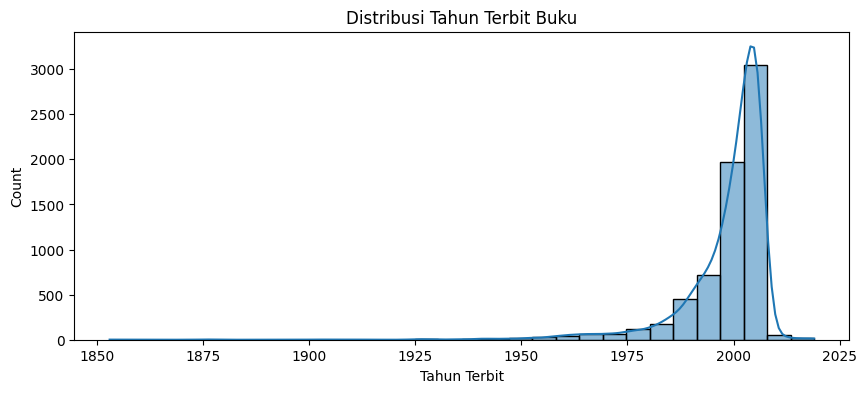

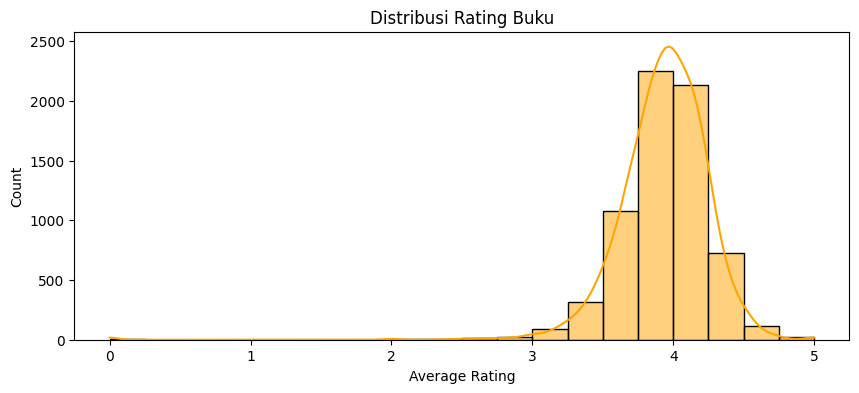

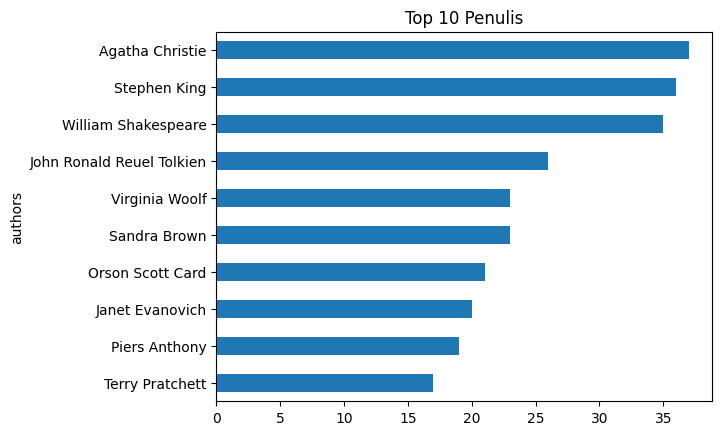

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribusi tahun terbit
plt.figure(figsize=(10,4))
sns.histplot(df['published_year'].dropna(), bins=30, kde=True)
plt.title("Distribusi Tahun Terbit Buku")
plt.xlabel("Tahun Terbit")
plt.show()

# Distribusi rating
plt.figure(figsize=(10,4))
sns.histplot(df['average_rating'].dropna(), bins=20, kde=True, color='orange')
plt.title("Distribusi Rating Buku")
plt.xlabel("Average Rating")
plt.show()

# Top 10 authors terbanyak
top_authors = df['authors'].value_counts().head(10)
top_authors.plot(kind='barh', title="Top 10 Penulis")
plt.gca().invert_yaxis()
plt.show()

1. Distribusi Tahun Terbit Buku
Penjelasan:

- Grafik menunjukkan distribusi jumlah buku berdasarkan tahun terbit.

- Terlihat bahwa sebagian besar buku diterbitkan setelah tahun 1980, dan puncaknya terjadi sekitar tahun 2000–2010.

- Sebelum tahun 1950, hanya sedikit buku yang ada dalam dataset.

- Hal ini bisa berarti bahwa dataset lebih banyak berisi buku-buku modern.

2. Distribusi Rating Buku
Penjelasan:

- Histogram menunjukkan distribusi average_rating dari buku-buku.

- Rata-rata rating buku berkisar antara 3.5 hingga 4.5.

- Distribusi cenderung normal (lonceng), dengan sedikit outlier di bawah 2 dan di atas 4.8.

- Artinya sebagian besar buku memiliki rating cukup baik, menunjukkan kemungkinan bias ke buku-buku populer atau berkualitas.

3. Top 10 Penulis
Penjelasan:

- Grafik horizontal bar chart menampilkan 10 penulis dengan jumlah buku terbanyak di dataset.

- Penulis paling banyak adalah Agatha Christie, diikuti oleh Stephen King dan William Shakespeare.

- Ini menunjukkan bahwa penulis-penulis ini sangat produktif atau karyanya banyak masuk dalam dataset.

Kesimpulan Univariate Analysis:
Univariate analysis fokus pada satu variabel dalam satu waktu, dan dari visualisasi di atas kita bisa menyimpulkan bahwa:

- Dataset didominasi oleh buku-buku yang terbit setelah tahun 1980.

- Rata-rata rating buku cukup tinggi dan terdistribusi normal.

- Beberapa penulis legendaris mendominasi jumlah karya dalam dataset.

# Data Preprocessing

Menghapus duplikat berdasarkan isbn13
Menghapus data yang penting tapi kosong(Data yang tidak memiliki judul, kategori, atau rating dihapus karena dianggap penting untuk rekomendasi.)

In [7]:
# Drop duplikat dan nilai kosong penting
df.drop_duplicates(subset='isbn13', inplace=True)
df.dropna(subset=['title', 'categories', 'average_rating'], inplace=True)
df.reset_index(drop=True, inplace=True)

# Data Preparation

In [8]:
# Ambil hanya satu kategori (pertama) jika kategori lebih dari satu dipisahkan dengan koma
df['categories'] = df['categories'].apply(lambda x: x.split(',')[0] if ',' in x else x)

# Isi deskripsi kosong dengan string kosong
df['description'] = df['description'].fillna('')

In [14]:
df.isnull().sum()

,0
isbn13,0
isbn10,0
title,0
subtitle,4328
authors,71
categories,0
thumbnail,271
description,0
published_year,3
average_rating,0


In [17]:
print("Jumlah duplikat:", df.duplicated().sum())

Jumlah duplikat: 0


In [18]:
df['authors'] = df['authors'].fillna("Unknown Author")
df['thumbnail'] = df['thumbnail'].fillna("https://via.placeholder.com/150")
df['published_year'] = df['published_year'].fillna(df['published_year'].median())

# Content-Based Filtering (Rekomendasi Berdasarkan Judul)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Gabungkan kategori dan deskripsi sebagai fitur
df['content'] = df['categories'] + " " + df['description']

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['content'])

# Cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Fungsi rekomendasi berdasarkan judul
def recommend_books_content(title, top_n=5):
    title = title.lower()
    if title not in df['title'].str.lower().values:
        return f"Judul '{title}' tidak ditemukan."

    idx = df[df['title'].str.lower() == title].index[0]
    similarity_scores = list(enumerate(cosine_sim[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[1:top_n+1]

    book_indices = [i[0] for i in similarity_scores]
    return df[['title', 'categories', 'average_rating']].iloc[book_indices]



# Evaluasi (test) Content based Filtering judul

In [22]:
recommend_books_content("Rage of angels")

,title,categories,average_rating
619,Organized Crime,Law,3.83
2244,The Client,Fiction,3.99
4686,For the Sins of My Father,Biography & Autobiography,4.05
4491,Trevayne,Organized Crime,3.62
2953,The Drawing of the Three,Fiction,4.23


Sistem ini bertujuan untuk merekomendasikan buku-buku yang mirip dari segi isi (konten), dalam hal ini berdasarkan gabungan kategori dan deskripsi, bukan dari perilaku pengguna

penjeleasan:

- Interpretasi Hasil:
  - Buku-buku yang direkomendasikan memiliki tema serupa dengan "Rage of Angels":

  - Genre seperti Fiction, Organized Crime, dan Drama Hukum (Legal Drama).

  - Hal ini menunjukkan bahwa sistem berhasil menangkap kemiripan konten, bukan hanya berdasarkan judul, tetapi berdasarkan topik utama yang dijelaskan dalam kategori dan deskripsi.

  - Rata-rata rating buku juga cukup tinggi (≥ 3.6), yang berarti hasil rekomendasinya layak dibaca.


In [10]:
pip install scikit-surprise

In [11]:
!pip install "numpy<2"

#Collaborative Filtering (Prediksi Rating Buku)

In [27]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

# Buat dataset Surprise
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(df[['isbn13', 'title', 'average_rating']], reader)

trainset, testset = train_test_split(data, test_size=0.2)

# Gunakan model SVD
model = SVD()
model.fit(trainset)

# Prediksi rating untuk buku yang belum dibaca pengguna
def recommend_books_collab(user_id='test_user', top_n=5):
    all_books = df['isbn13'].unique()
    predictions = [model.predict(user_id, book_id) for book_id in all_books]
    predictions.sort(key=lambda x: x.est, reverse=True)

    top_books = predictions[:top_n]
    book_ids = [pred.iid for pred in top_books]
    return df[df['isbn13'].isin(book_ids)][['title', 'categories', 'average_rating']]

# Contoh
recommend_books_collab()


,title,categories,average_rating
0,Gilead,Fiction,3.85
1,Spider's Web,Detective and mystery stories,3.83
2,The One Tree,American fiction,3.97
3,Rage of angels,Fiction,3.93
4,The Four Loves,Christian life,4.15


# Evaluasi Colaborative filtering

In [19]:
from surprise import accuracy

predictions = model.test(testset)
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

RMSE: 0.3367
MAE:  0.2272


Sistem ini bertujuan untuk memprediksi rating buku yang belum dibaca oleh pengguna, berdasarkan pola rating pengguna lain terhadap buku-buku yang sama atau serupa. Sistem ini tidak melihat isi/konten buku, melainkan mengandalkan kesamaan perilaku pengguna.

interpretasi Rekomendasi Collaborative Filtering

- Berbasis Statistik Rating Pengguna Lain
Sistem merekomendasikan buku kepada 'test_user' meskipun tidak ada data riil pengguna ini, dengan mengandalkan pola rating dari pengguna lain pada buku-buku populer.

- Fokus pada Pola, Bukan Isi Buku
Model tidak mempertimbangkan genre atau deskripsi buku. Buku dari genre yang berbeda bisa direkomendasikan jika memiliki rating tinggi secara umum.

- Buku Populer Cenderung Direkomendasikan
Buku-buku dengan average rating tinggi seperti Fiction, Mystery, dan Christian Life muncul karena disukai oleh banyak pengguna, bukan karena kemiripan konten.